In [54]:
#Downloading the Titanic dataset from Kaggle and save it to orig_df, a copy is provided with this exercise and you can upload it to your drive folder.
import pandas as pd
df = pd.read_csv('titanic3.csv')
orig_df = df

In [56]:
#Explore the Titanic dataset
#Print all samples and check how many samples and features the Titanic dataset has
print(orig_df)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00  

In [58]:
#Check the type of each variable (data type)
#int type is ok, float64 is ok as well but you may change it to int, object type need to be changed to int (object is a string in pandas and perform a string operation)
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [60]:
#Use shape attribute to check the raws (samples) and columns (features)
df.shape

(1309, 14)

In [62]:
#Use describe attribute to explore the data statistics
#Can you tell me a little bit about the data, for example the age groups
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The p-class data has a maximum range of 3 
survival is binary data, so it only has 0 to 1 
the average group has an average of 29 years of age, the standard deviation is 14, the upper and lower bracket of 25% is 21, the middle of 50% is 28, and the higher bracket of 75 is 39. maximum age is 80. 
sibs data has a mean of 49, the highest value is eight, the minimum volume is zero parts has a mean of 0.38, the maximum volume is nine, the minimum value is 0, and the flared to set has an average of 33. The standard deviation is 51, the lower 25% is 7.8, the 50% is 14.45, and the high bracket of 75 is 31.27. 
The body weight is an average of 160, the standard deviation is 97, the minimum value is one, and the maximum value is 328 

In [65]:
#Use describe attribute at different location to explore the data statistics
#Use 3 or 4 instead of 2 to include more features (this is useful when you have lots of features)
df.describe().iloc[:,:3]

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881138
std,0.837836,0.486055,14.413493
min,1.000000,0.000000,0.170000
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [67]:
#Use isnull() to find columns or rows with missing values and sum them up to get the total of missing values
#Which features are the leak features?
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [69]:
#We can create a boolean array (a series with True or False to indicate if a row (a sample) has missing data)
#and use it to inspect rows that are missing data
mask = df.isnull()

In [71]:
mask.head()  # rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [73]:
#Let's improve the process by using the function any that iterate through each row and return true for any x in the raw = true
mask = df.isnull().any(axis=1)

In [75]:
mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [77]:
df[mask].body.head() # check body column

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

In [79]:
df[mask].age.head() # check age column


0    29.00
1     0.92
2     2.00
3    30.00
4    25.00
Name: age, dtype: float64

In [81]:
df[mask].embarked.head() # check embarked column

0    S
1    S
2    S
3    S
4    S
Name: embarked, dtype: object

In [83]:
#Use the .value_counts method to examine the counts of the values:
df.sex.value_counts(dropna=False) # How many male and female
# Assign dropna to false if you don't want to delete the missing values

sex
male      843
female    466
Name: count, dtype: int64

In [85]:
#Use the .value_counts method to examine the counts of the values:
df.embarked.value_counts(dropna=False)

embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

In [87]:
#Use the .value_counts method to examine the counts of the values:
df.age.value_counts(dropna=False)

age
NaN      263
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
66.00      1
0.67       1
76.00      1
67.00      1
26.50      1
Name: count, Length: 99, dtype: int64

In [89]:
#Delete raws with high percentage of missing values
df = df.drop(
     columns=[
         "name",
         "ticket",
         "home.dest",
         "boat",
         "body",
         "cabin",
     ]
 )

In [91]:
#Use the attribute describe to check whether you managed to delete the columns
#Compare it with the above df.describe()
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [93]:
#Working with missing data

#Populate age missing values with thier median

df['age'] = df['age'].fillna(df['age'].median())

#Populate embarked missing values with high occurrence value

df['embarked'] = df['embarked'].fillna('S')

# map sex to a numeric type
df.sex = df.sex.map({'male': 1, 'female': 0})

# map embarked to a numeric type
df.embarked = df.embarked.map({'S': 2, 'C': 1, 'Q':0})

#fill any other missing value with 0 (is not good practice but to avoid common error of NaN value still exist)
df.fillna(0,inplace=True)

In [95]:
print(df.sex)

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64


In [97]:
#Splitting data into training and testing datasets
from sklearn.model_selection import train_test_split
#Assign survived column (targets) to y
y = df.survived
#Delete survived column from X (samples)
X = df.drop(columns="survived")
#Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [99]:
#check the y_train (target)
print(y_train)

1182    1
1106    0
558     1
1125    0
793     0
       ..
583     1
332     0
1293    0
1115    0
1104    0
Name: survived, Length: 916, dtype: int64


In [101]:
#check the X_train (samples)
print(X_train)

      pclass  sex   age  sibsp  parch     fare  embarked
1182       3    0  21.0      0      0   7.6500         2
1106       3    0  41.0      0      5  39.6875         2
558        2    0  18.0      0      2  13.0000         2
1125       3    1  24.0      0      0   8.0500         2
793        3    1  47.0      0      0   7.2500         2
...      ...  ...   ...    ...    ...      ...       ...
583        2    0  40.0      0      0  15.7500         2
332        2    1  23.0      0      0  10.5000         2
1293       3    1  28.0      0      0   8.0500         2
1115       3    1  28.0      0      0   7.7750         2
1104       3    1  16.0      4      1  39.6875         2

[916 rows x 7 columns]


In [103]:
#call the ML algorithm
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [105]:
#Get the predicted and expected
#Can you tell what is predicted and expected values represent?
#Can you derive the misclassified values (wrong)
predicted = clf.predict(X=X_test)
expected = y_test


In [107]:
#Now print the model accuracy
print(f'{clf.score(X_test, y_test):.2%}')
clf.predict(X_test)


80.41%


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Mean accuracy: 79.88%


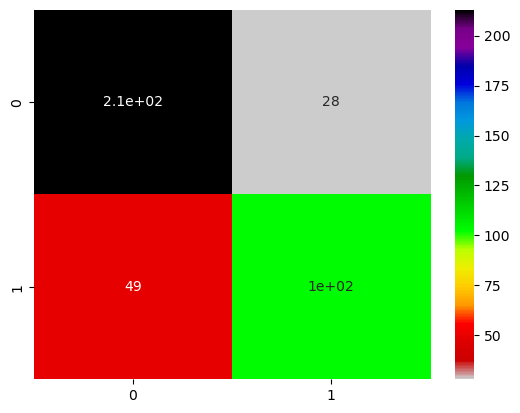

In [148]:
#Can you evaluate and validate the model using k-fold?
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10,random_state=11,shuffle=True)
# Perform cross-validation
scores = cross_val_score(estimator=clf, X=X_test,
    y=y_test, cv=kfold)
scores
print(f'Mean accuracy: {scores.mean():.2%}')
#Can you get the confusion matrix?

#imports the confusion matrix calls 
from sklearn.metrics import confusion_matrix

#fits the predicted and expected results into the matrix 
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

#importing the libary 
import pandas as pd

#build the confusion matrix 
confusion_df = pd.DataFrame(confusion, index=range(2),
         columns=range(2))

import seaborn as sns
#plot that data in matrix

axes = sns.heatmap(confusion_df, annot=True,
         cmap='nipy_spectral_r')

In [111]:
#Save and test the model
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(clf)

# Load the pickled model
clf_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
clf_from_pickle.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [150]:
# To save a machine learning model produced by scikit-learn (sklearn), you can use Python's joblib library,
# which is often preferred for saving scikit-learn models due to its efficiency.

#First, ensure you have the joblib library installed. If you don't have it, you can install it using pip:

# pip install joblib

# Once you have your scikit-learn model trained and ready to save, import joblib:
import joblib


# Save the model as a pickle in a file
# You can use the joblib.dump() function. Provide the model and the file path where you want to save it:
joblib.dump(clf, 'filename.pkl')

# Load the model from the file
# Your scikit-learn model is now saved to the specified file with the ".pkl" extension.
# To load the model at a later time for use, you can use joblib.load():
clf_from_joblib = joblib.load('filename.pkl')

# Use the loaded model to make predictions
clf_from_joblib.predict(X_test)

# This process allows you to save and load scikit-learn models efficiently, preserving their state for future use without the need to retrain them.

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,